In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### PLOTTING FUNCTIONS

In [2]:
# Function to plot specified variable per run
def plot_all_runs(df_list, var, color=None):
    label = var
    for df in df_list:
        df[var].plot(label=label, color=color) if color else df[var].plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_difference(df_list, var1, var2):
    label = str(var1) + " - " + str(var2)
    for df in df_list:
        diff = df[var1] - df[var2]
        diff.plot(label=label)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel("Amount")
    plt.legend()

def plot_avg_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].mean().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

def plot_total_per_type(df_list, agent_type, var, color=None):
    label = agent_type
    for df in df_list:
        df = df[df["Type"] == agent_type]
        df.groupby(["Step"])[var].sum().plot(label=label, color=color)
        label="_nolegend_"  # This avoids duplicates in plot legend
    plt.xlabel("Time")
    plt.ylabel(var)
    plt.legend()

### READ DATA

#### Model variables

In [3]:
# Read all model variables to list
model_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("model"):
        df = pd.read_csv("results/" + file)
        model_vars_df_list.append(df)

# Show first dataframe
model_vars_df_list[0]

,n_agents,n_households,n_cap_firms,n_cons_firms,n_serv_firms,HH consumption,Regional demand,Export demand,Unemployment rate,Min wage,Avg wage,Frac machines dead
0,5626,5000,125,200,300,1540.590542,1540.590,0.0,0.78,0.100,1.024969,0.029984
1,5626,5000,125,200,300,3437.708542,3437.709,0.0,0.66,0.510,1.024614,0.007854
2,5626,5000,125,200,300,4286.226542,4286.227,0.0,0.33,0.510,1.029828,0.008108
3,5626,5000,125,200,300,4556.552542,4556.553,0.0,0.23,0.515,1.026765,0.011231
4,5626,5000,125,200,300,4226.612311,4226.613,0.0,0.36,0.515,1.027605,0.012636
...,...,...,...,...,...,...,...,...,...,...,...,...
395,5626,5000,125,200,300,4561.964460,4561.964,0.0,0.22,0.510,1.024832,0.051757
396,5626,5000,125,200,300,4585.151832,4585.152,0.0,0.21,0.510,1.025098,0.038376
397,5626,5000,125,200,300,4562.485532,4562.486,0.0,0.22,0.515,1.024612,0.049113
398,5626,5000,125,200,300,4554.127618,4554.127,0.0,0.22,0.510,1.024935,0.048235


#### Agent variables

In [4]:
agent_vars_df_list = []
for file in os.listdir("results/"):
    if file.startswith("agent"):
        print(file)
        df = pd.read_csv("results/" + file)
        agent_vars_df_list.append(df)

agent_vars_df_list[0]

agent_vars_20.csv
agent_vars_0.csv


,Step,AgentID,Type,Price,Market share,Prod,Inventories,Production made,Past demand,Real demand,Wage,Net worth,Debt,Size,Labor demand,Capital desired,Capital amount,Capital ordered
0,1,1,<class 'CRAB_agents.CapitalFirm'>,1.318000,0.008000,1.0,1.000,1.0,3.00,0.000,1.014004,150.000000,0.0,1.0,1.0,NaN,60.0,NaN
1,1,2,<class 'CRAB_agents.CapitalFirm'>,1.336000,0.008000,1.0,1.000,1.0,3.00,0.000,1.027552,150.000000,0.0,1.0,1.0,NaN,48.0,NaN
2,1,3,<class 'CRAB_agents.CapitalFirm'>,1.328000,0.008000,1.0,1.000,1.0,3.00,0.000,1.021542,150.000000,0.0,1.0,1.0,NaN,57.0,NaN
3,1,4,<class 'CRAB_agents.CapitalFirm'>,1.310000,0.008000,1.0,1.000,1.0,3.00,0.000,1.007740,150.000000,0.0,1.0,1.0,NaN,54.0,NaN
4,1,5,<class 'CRAB_agents.CapitalFirm'>,1.352000,0.008000,1.0,1.000,1.0,3.00,0.000,1.039847,150.000000,0.0,1.0,1.0,NaN,54.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2250395,400,6587,<class 'CRAB_agents.ServiceFirm'>,1.221600,0.000912,1.0,0.622,3.0,4.35,2.378,1.018000,51.375410,0.0,3.0,3.0,NaN,10.0,NaN
2250396,400,6588,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.231200,0.000703,1.0,1.221,2.0,3.00,0.779,1.026000,55.748637,0.0,2.0,2.0,NaN,2.0,NaN
2250397,400,6589,<class 'CRAB_agents.ServiceFirm'>,1.246800,0.000726,1.0,0.145,2.0,3.00,1.855,1.039000,104.035673,0.0,2.0,2.0,NaN,8.0,NaN
2250398,400,6590,<class 'CRAB_agents.ConsumptionGoodFirm'>,1.216848,0.000000,1.0,0.000,1.0,2.00,1.000,1.008000,71.009166,NaN,0.0,NaN,NaN,7.0,NaN


### SANITY CHECKS

#### N FIRMS

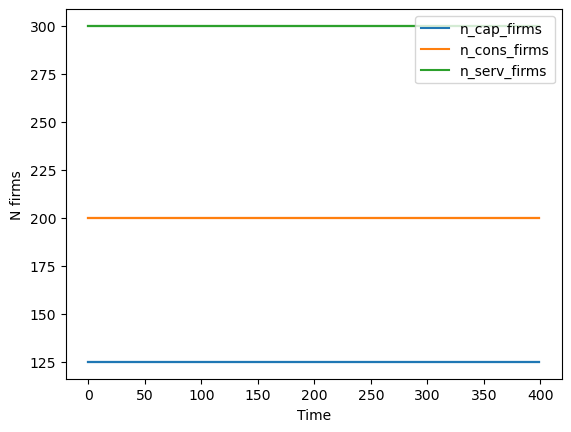

In [5]:
# Plot number of firms per sector
plot_all_runs(model_vars_df_list, "n_cap_firms", color="tab:blue")
plot_all_runs(model_vars_df_list, "n_cons_firms", color="tab:orange")
plot_all_runs(model_vars_df_list, "n_serv_firms", color="tab:green")

plt.ylabel("N firms")
plt.show()

#### CONSUMPTION

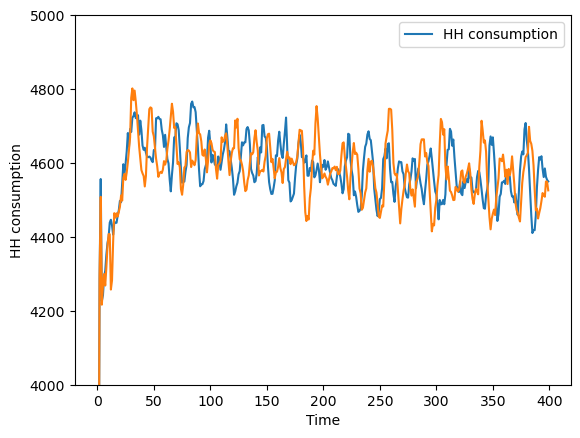

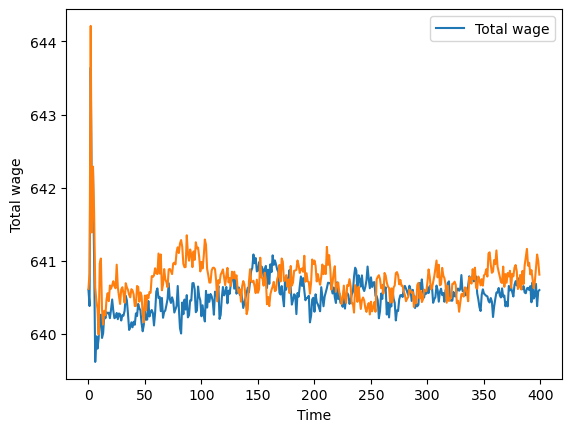

In [6]:
plot_all_runs(model_vars_df_list, "HH consumption")
# plt.ylim(4000, 5000)
plt.show()

for df in model_vars_df_list:
    df["Total wage"] = df["Avg wage"] * 625
plot_all_runs(model_vars_df_list, "Total wage")
plt.show()

#### REAL DEMAND

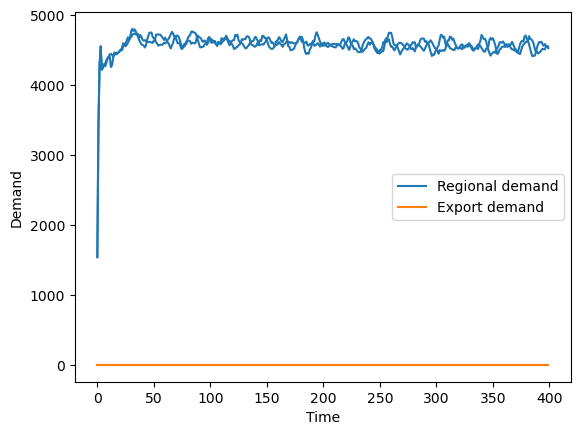

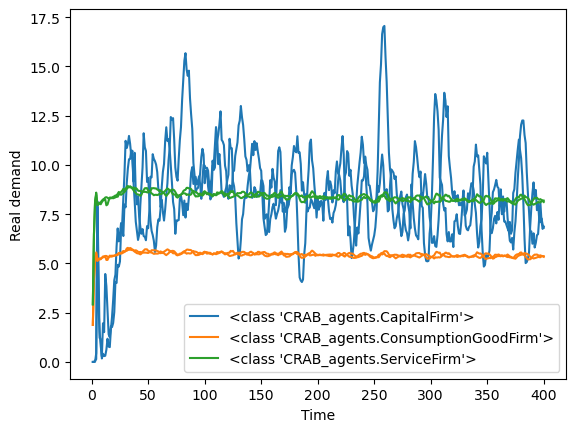

In [8]:
# Plot ratio regional:export demand
plot_all_runs(model_vars_df_list, "Regional demand", color="tab:blue")
plot_all_runs(model_vars_df_list, "Export demand", color="tab:orange")

# plt.ylim(4000, 5000)
plt.ylabel("Demand")
plt.show()

# Plot average demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Real demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Real demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Real demand", color="tab:green")
plt.show()

#### LABOR

##### UNEMPLOYMENT RATE

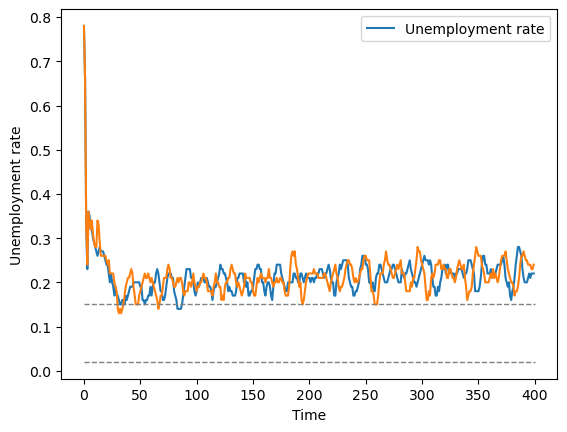

In [7]:
# Unemployment rate should vary between min 2-3 and max 10-15 percent
n_steps = len(model_vars_df_list[0])
plot_all_runs(model_vars_df_list, "Unemployment rate")
plt.hlines(y=0.02, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.hlines(y=0.15, xmin=0, xmax=n_steps, color="grey", linestyle="--", linewidth=1)
plt.show()

##### LABOR DEMAND

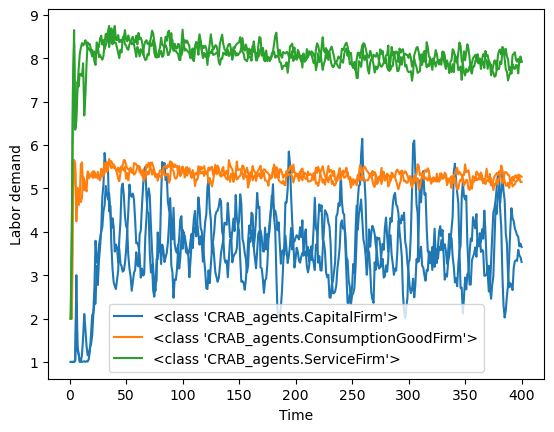

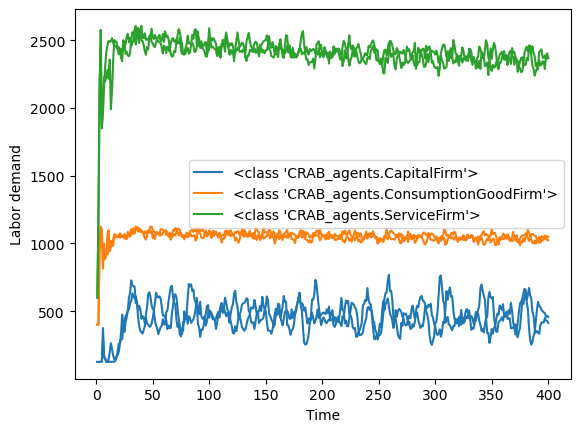

In [9]:
# Plot average labor demand per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

# Plot total labor demand per sector
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Labor demand", color="tab:blue")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Labor demand", color="tab:orange")
plot_total_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Labor demand", color="tab:green")
plt.show()

##### SIZE

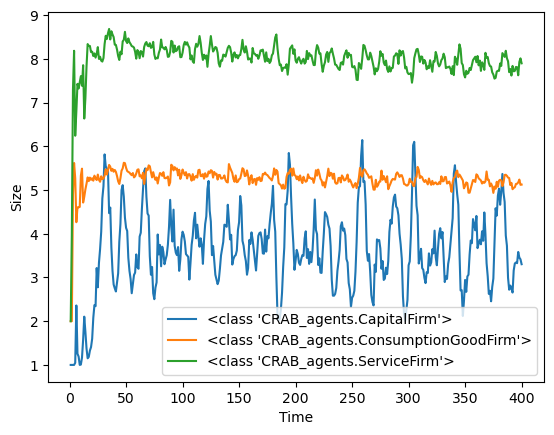

In [211]:
# Plot size (n employers) for all firms (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Size", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Size", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Size", color="tab:green")
plt.show()

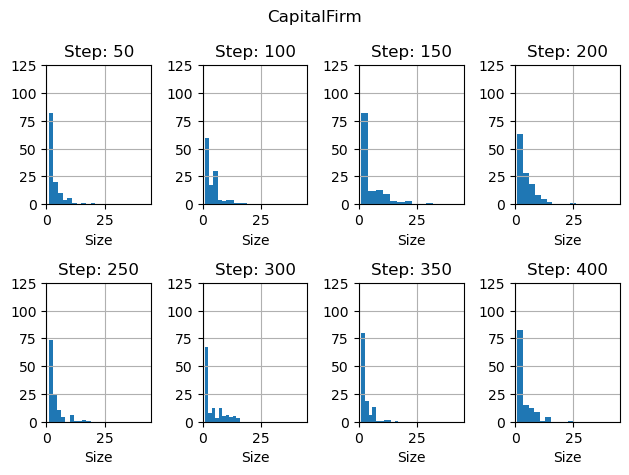

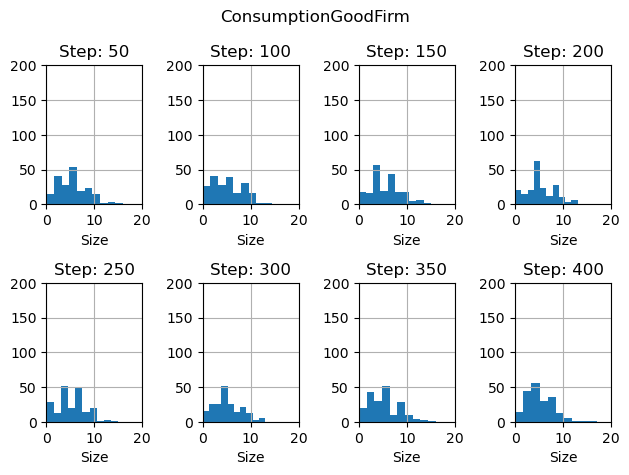

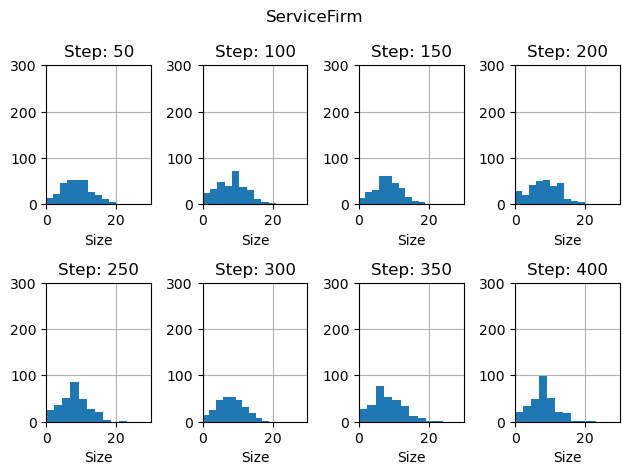

In [194]:
# Plot distribution of firms sizes at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  "<class 'CRAB_agents.CapitalFirm'>": (45, 125),
                  "<class 'CRAB_agents.ConsumptionGoodFirm'>": (20, 200),
                  "<class 'CRAB_agents.ServiceFirm'>": (30, 300),
                 }

for k, v in firm_size_dict.items():
    for i in np.arange(9, 400, 10):
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", bins=10)
        plt.title("TIMESTEP: " + str(i+1) + " " + k)
        plt.xlabel("Size")
        plt.ylim(0, v[1])
        plt.xlim(0, v[0])
        # plt.show()
        plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
        plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Size", ax=a, bins=10)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Size")
        a.set_ylim(0, v[1])
        a.set_xlim(0, v[0])
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    plt.savefig("results/plots/sizes/" + str(k).split(".")[-1][:-2])

In [ ]:
# Plot distribution of firms market share at end of simulation
df = agent_vars_df_list[0]

firm_size_dict = {
                  # "<class 'CRAB_agents.CapitalFirm'>": (0.01, 150),
                  "<class 'CRAB_agents.ConsumptionGoodFirm'>": (0.02, 20),
                  "<class 'CRAB_agents.ServiceFirm'>": (0.015, 20),
                 }

for k, v in firm_size_dict.items():
    for i in np.arange(9, 400, 10):
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Market share", bins=100)
        plt.title("TIMESTEP: " + str(i+1) + " " + k)
        plt.xlabel("Market share")
        plt.ylim(0, v[1])
        plt.xlim(0, v[0])
        # plt.savefig("results/plots/MS/" + str(k).split(".")[-1][:-2] + "_timestep" + str(i+1))
        plt.close()

for k, v in firm_size_dict.items():
    fig, ax = plt.subplots(2, 4)
    for j, i in enumerate(np.arange(49, 400, 50)):
        a = ax[j//4][j%4]
        df_new = df[(df["Step"] == i) & (df["Type"] == k)]
        df_new.hist("Market share", ax=a, bins=50)
        a.set_title("Step: " + str(i+1))
        a.set_xlabel("Market share")
        a.set_ylim(0, v[1])
        a.set_xlim(0, 0.002)
    fig.suptitle(k.split(".")[-1][:-2])
    fig.tight_layout()
    # plt.savefig("results/plots/MS/" + str(k).split(".")[-1][:-2])

#### MIN and AVERAGE WAGE

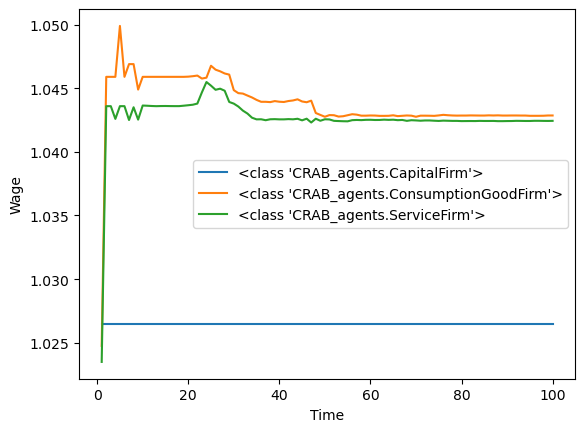

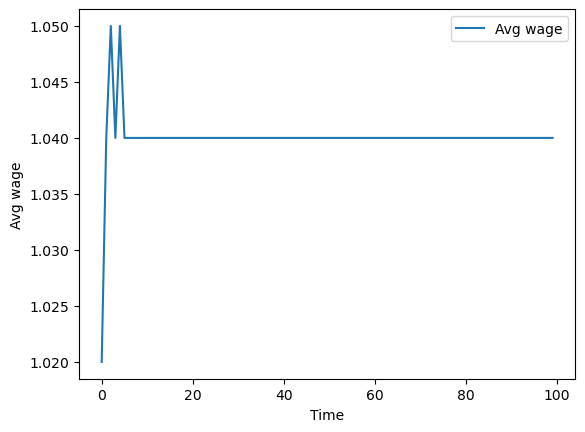

In [43]:
# Plot average wage
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

plot_all_runs(model_vars_df_list, "Avg wage")
plt.show()

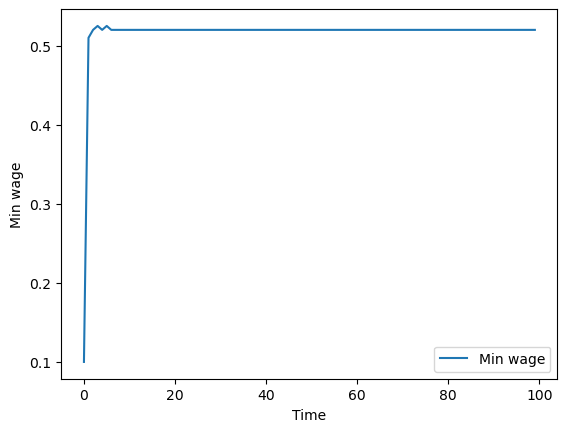

In [44]:
# Plot minimum wage
plot_all_runs(model_vars_df_list, "Min wage", color="tab:blue")
plt.show()

#### PRICES

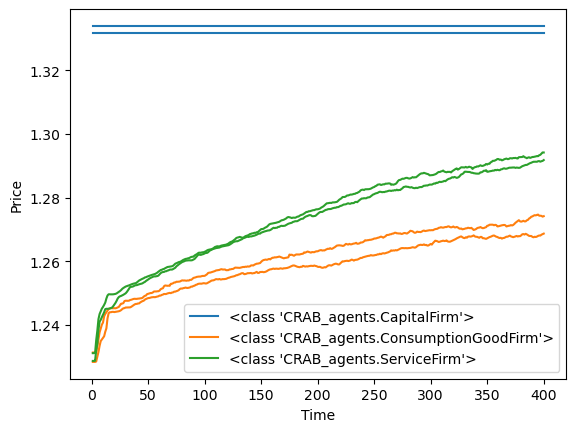

In [13]:
# Plot average prices per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Price", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Price", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Price", color="tab:green")
plt.show()

#### MARKET SHARES

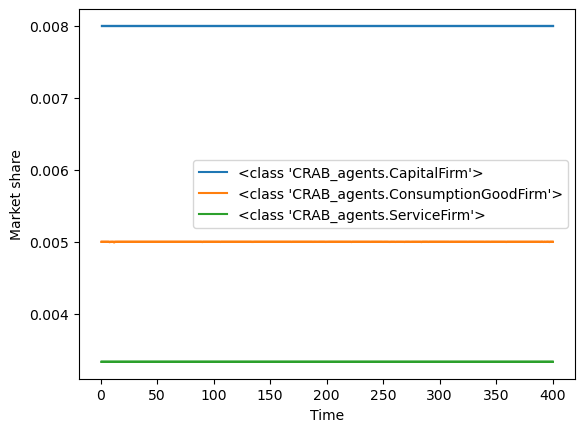

In [12]:
# Plot average market share per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Market share", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Market share", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Market share", color="tab:green")
plt.show()

In [ ]:
# Plot market share distribution

#### NET WORTH

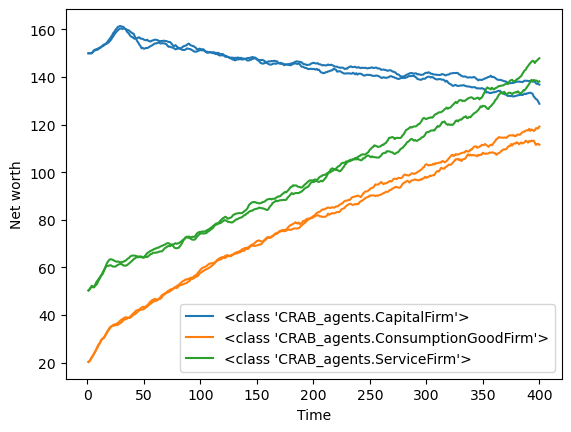

In [14]:
# Plot average net worth per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Net worth", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Net worth", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Net worth", color="tab:green")
plt.show()

#### PRODUCTIVITY and WAGES

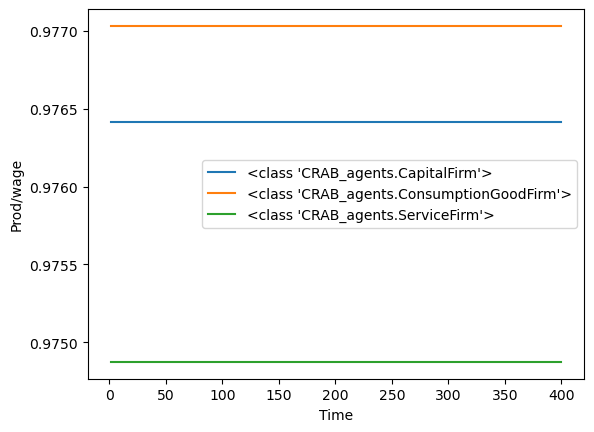

In [70]:
# Plot average ratio productivity : wage per sector
for df in agent_vars_df_list:
    df["Prod/wage"] = df["Prod"]/df["Wage"]
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod/wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod/wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod/wage", color="tab:green")
plt.show()

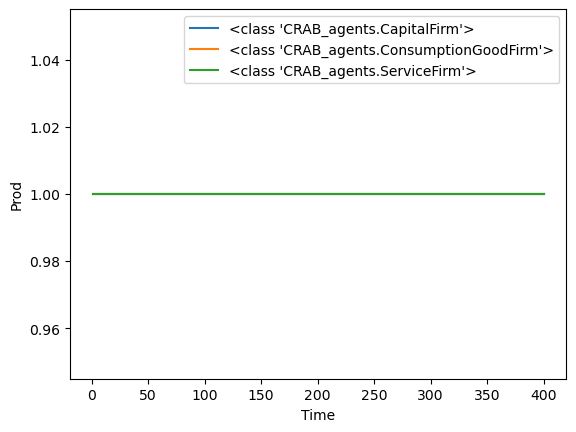

In [71]:
# Plot average productivity per sector
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Prod", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Prod", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Prod", color="tab:green")
plt.show()

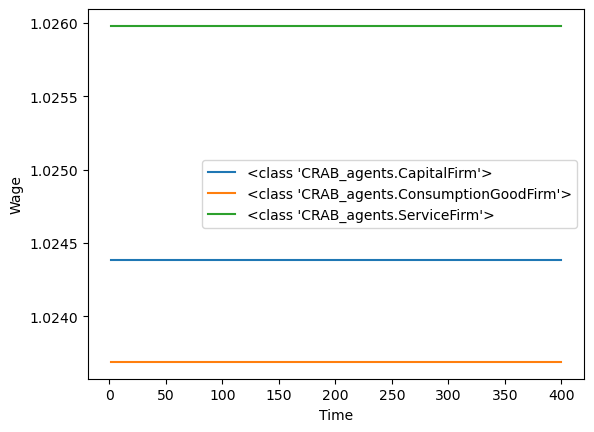

In [72]:
# Plot wages
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Wage", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Wage", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Wage", color="tab:green")
plt.show()

#### Inventories

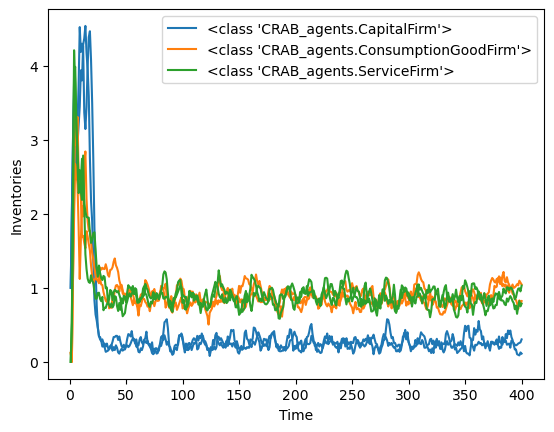

In [15]:
# Plot inventory level
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Inventories", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Inventories", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Inventories", color="tab:green")
plt.show()

##### Production made

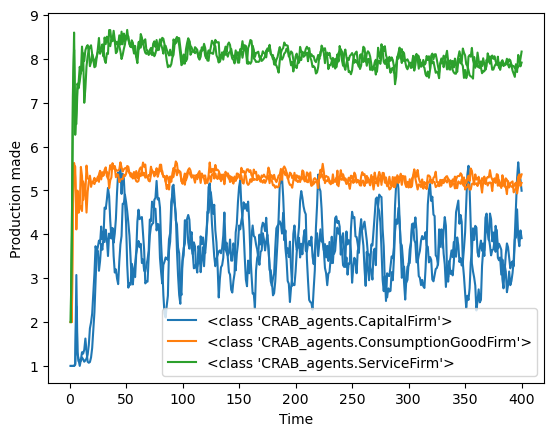

In [16]:
# Plot production made
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Production made", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Production made", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Production made", color="tab:green")
plt.show()

#### MACHINES

##### Capital amount

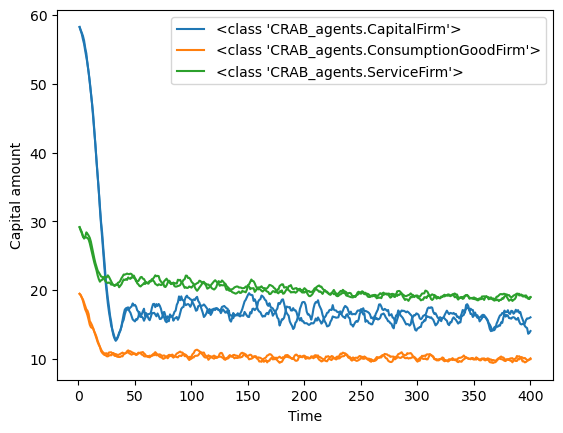

In [40]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital amount", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital amount", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital amount", color="tab:green")
plt.show()

##### Capital demand (average per sector)

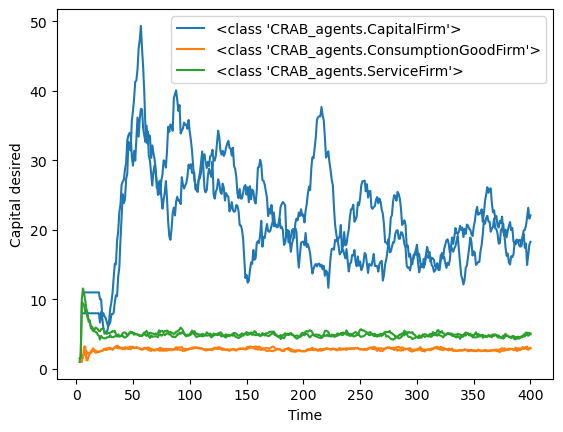

In [17]:
# Plot difference between desired machines and ordered machines (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital desired", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital desired", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital desired", color="tab:green")
plt.show()

##### Orders per sector

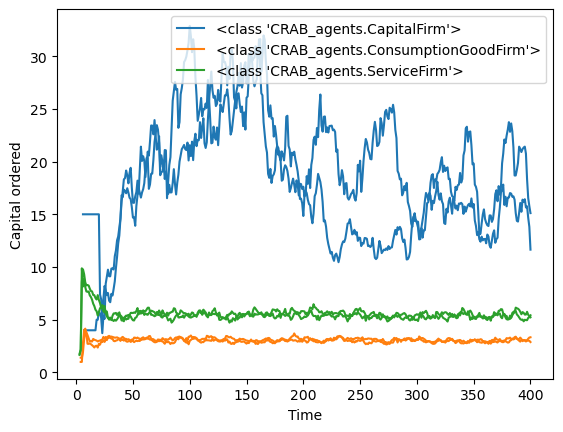

In [42]:
# Plot orders per sector (average)
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.CapitalFirm'>", var="Capital ordered", color="tab:blue")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ConsumptionGoodFirm'>", var="Capital ordered", color="tab:orange")
plot_avg_per_type(agent_vars_df_list, agent_type="<class 'CRAB_agents.ServiceFirm'>", var="Capital ordered", color="tab:green")
plt.show()

##### Machine lifetimes/moment of replacement

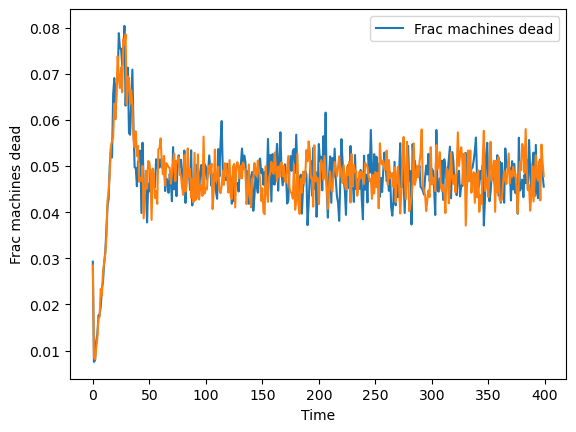

In [43]:
# Plot number of machines died every timestep
plot_all_runs(model_vars_df_list, "Frac machines dead")